Flight Activity Analysis at King Khalid International Airport (RUH)

Objective
Analyze real-world flight data from King Khalid International Airport (RUH) to understand flight activity patterns, identify peak hours, and explore airline operations through data cleaning and exploratory data analysis.

In [2]:
import pandas as pd

df = pd.read_parquet("flights_RUH.parquet")

In [3]:
df.head()

,flight_number,aircraft.model,aircraft.reg,aircraft.modeS,airline.name,airline.iata,airline.icao,status,flight_type,codeshareStatus,...,origin_airport_icao,origin_airport_iata,movement.terminal,movement.quality,destination_airport_icao,destination_airport_iata,destination_airport_name,movement.airport.timeZone,movement.scheduledTime.utc,movement.scheduledTime.local
0,PF 769,Airbus A320,None,None,Air Sial,PF,None,Unknown,departure,Unknown,...,OERK,RUH,2,[Basic],OPIS,ISB,Islamabad,Asia/Karachi,2025-03-14 21:01Z,2025-03-15 00:01+03:00
1,XY 333,Airbus A320 NEO,HZ-NS35,710DB9,flynas,XY,KNE,Unknown,departure,IsOperator,...,OERK,RUH,1,[Basic],VILK,LKO,Lucknow,Asia/Kolkata,2025-03-14 21:05Z,2025-03-15 00:05+03:00
2,QP 568,Boeing 737,None,None,Starlight Airline,QP,SLT,Unknown,departure,Unknown,...,OERK,RUH,3,[Basic],VABB,BOM,Mumbai,Asia/Kolkata,2025-03-14 21:05Z,2025-03-15 00:05+03:00
3,F3 161,Airbus A320,None,None,flyadeal,F3,FAD,Unknown,departure,Unknown,...,OERK,RUH,5,[Basic],OEJN,JED,Jeddah,Asia/Riyadh,2025-03-14 21:10Z,2025-03-15 00:10+03:00
4,KL 423,Airbus A330-300,None,None,KLM,KL,KLM,Unknown,departure,Unknown,...,OERK,RUH,1,[Basic],OEDF,DMM,Ad Dammam,Asia/Riyadh,2025-03-14 21:15Z,2025-03-15 00:15+03:00


In [4]:
df.tail()

,flight_number,aircraft.model,aircraft.reg,aircraft.modeS,airline.name,airline.iata,airline.icao,status,flight_type,codeshareStatus,...,origin_airport_icao,origin_airport_iata,movement.terminal,movement.quality,destination_airport_icao,destination_airport_iata,destination_airport_name,movement.airport.timeZone,movement.scheduledTime.utc,movement.scheduledTime.local
153303,XY 132,None,None,None,flynas,XY,KNE,Unknown,arrival,Unknown,...,OERK,RUH,5,[Basic],OEHL,HAS,Khail,Asia/Riyadh,2025-10-10 08:20Z,2025-10-10 11:20+03:00
153304,SV 1458,None,None,None,Saudi Arabian,SV,SVA,Expected,arrival,Unknown,...,OERK,RUH,5,[Basic],OEMA,MED,Medina,Asia/Riyadh,2025-10-10 08:30Z,2025-10-10 11:30+03:00
153305,KU 773,None,None,None,Kuwait,KU,KAC,Unknown,arrival,Unknown,...,OERK,RUH,3,[Basic],OKBK,KWI,Kuwait City,Asia/Kuwait,2025-10-10 08:30Z,2025-10-10 11:30+03:00
153306,SV 563,None,None,None,Saudi Arabian,SV,SVA,Unknown,arrival,IsOperator,...,OERK,RUH,4,[Basic],OMDB,DXB,Dubai,Asia/Dubai,2025-10-10 08:40Z,2025-10-10 11:40+03:00
153307,XY 328,None,None,None,flynas,XY,KNE,Unknown,arrival,IsOperator,...,OERK,RUH,1,[Basic],VOCL,CCJ,Calicut,Asia/Kolkata,2025-10-10 08:45Z,2025-10-10 11:45+03:00


In [5]:
df.shape

(153308, 23)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 153308 entries, 0 to 153307
Data columns (total 23 columns):
 #   Column                        Non-Null Count   Dtype 
---  ------                        --------------   ----- 
 0   flight_number                 153308 non-null  object
 1   aircraft.model                153122 non-null  object
 2   aircraft.reg                  36234 non-null   object
 3   aircraft.modeS                45331 non-null   object
 4   airline.name                  153308 non-null  object
 5   airline.iata                  153294 non-null  object
 6   airline.icao                  152745 non-null  object
 7   status                        153308 non-null  object
 8   flight_type                   153308 non-null  object
 9   codeshareStatus               153308 non-null  object
 10  isCargo                       153308 non-null  bool  
 11  callSign                      45137 non-null   object
 12  origin_airport_name           153308 non-null  object
 13 

In [7]:
df.describe()

,flight_number,aircraft.model,aircraft.reg,aircraft.modeS,airline.name,airline.iata,airline.icao,status,flight_type,codeshareStatus,...,origin_airport_icao,origin_airport_iata,movement.terminal,movement.quality,destination_airport_icao,destination_airport_iata,destination_airport_name,movement.airport.timeZone,movement.scheduledTime.utc,movement.scheduledTime.local
count,153308,153122,36234,45331,153308,153294,152745,153308,153308,153308,...,153308,153308,152458,153308,149202,149202,153308,149202,153308,153308
unique,1369,48,1431,1612,68,62,63,5,2,2,...,1,1,5,1,120,120,128,48,54364,54364
top,LH 622,Airbus A320,HZ-NS34,717CEA,Saudi Arabian,SV,SVA,Unknown,departure,Unknown,...,OERK,RUH,5,[Basic],OEJN,JED,Jeddah,Asia/Riyadh,2025-09-04 13:00Z,2025-09-04 16:00+03:00
freq,403,59394,391,390,60886,60886,60886,128618,78252,104554,...,153308,153308,80729,153308,27444,27444,27938,79413,16,16


In [8]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 

In [9]:
df= pd.read_parquet("flights_RUH.parquet")

In [10]:
df_raw = df.copy()

In [11]:
df.shape

(153308, 23)

In [12]:
df.columns

Index(['flight_number', 'aircraft.model', 'aircraft.reg', 'aircraft.modeS',
       'airline.name', 'airline.iata', 'airline.icao', 'status', 'flight_type',
       'codeshareStatus', 'isCargo', 'callSign', 'origin_airport_name',
       'origin_airport_icao', 'origin_airport_iata', 'movement.terminal',
       'movement.quality', 'destination_airport_icao',
       'destination_airport_iata', 'destination_airport_name',
       'movement.airport.timeZone', 'movement.scheduledTime.utc',
       'movement.scheduledTime.local'],
      dtype='object')

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 153308 entries, 0 to 153307
Data columns (total 23 columns):
 #   Column                        Non-Null Count   Dtype 
---  ------                        --------------   ----- 
 0   flight_number                 153308 non-null  object
 1   aircraft.model                153122 non-null  object
 2   aircraft.reg                  36234 non-null   object
 3   aircraft.modeS                45331 non-null   object
 4   airline.name                  153308 non-null  object
 5   airline.iata                  153294 non-null  object
 6   airline.icao                  152745 non-null  object
 7   status                        153308 non-null  object
 8   flight_type                   153308 non-null  object
 9   codeshareStatus               153308 non-null  object
 10  isCargo                       153308 non-null  bool  
 11  callSign                      45137 non-null   object
 12  origin_airport_name           153308 non-null  object
 13 

In [15]:
df.head()

,flight_number,aircraft.model,aircraft.reg,aircraft.modeS,airline.name,airline.iata,airline.icao,status,flight_type,codeshareStatus,...,origin_airport_icao,origin_airport_iata,movement.terminal,movement.quality,destination_airport_icao,destination_airport_iata,destination_airport_name,movement.airport.timeZone,movement.scheduledTime.utc,movement.scheduledTime.local
0,PF 769,Airbus A320,None,None,Air Sial,PF,None,Unknown,departure,Unknown,...,OERK,RUH,2,[Basic],OPIS,ISB,Islamabad,Asia/Karachi,2025-03-14 21:01Z,2025-03-15 00:01+03:00
1,XY 333,Airbus A320 NEO,HZ-NS35,710DB9,flynas,XY,KNE,Unknown,departure,IsOperator,...,OERK,RUH,1,[Basic],VILK,LKO,Lucknow,Asia/Kolkata,2025-03-14 21:05Z,2025-03-15 00:05+03:00
2,QP 568,Boeing 737,None,None,Starlight Airline,QP,SLT,Unknown,departure,Unknown,...,OERK,RUH,3,[Basic],VABB,BOM,Mumbai,Asia/Kolkata,2025-03-14 21:05Z,2025-03-15 00:05+03:00
3,F3 161,Airbus A320,None,None,flyadeal,F3,FAD,Unknown,departure,Unknown,...,OERK,RUH,5,[Basic],OEJN,JED,Jeddah,Asia/Riyadh,2025-03-14 21:10Z,2025-03-15 00:10+03:00
4,KL 423,Airbus A330-300,None,None,KLM,KL,KLM,Unknown,departure,Unknown,...,OERK,RUH,1,[Basic],OEDF,DMM,Ad Dammam,Asia/Riyadh,2025-03-14 21:15Z,2025-03-15 00:15+03:00


In [16]:
df['movement.scheduledTime.local'] = pd.to_datetime(
    df['movement.scheduledTime.local'],
    errors='coerce'
)

In [17]:
df['flight_key'] = (
    df['flight_number'].astype(str) + "_" +
    df['movement.scheduledTime.local'].astype(str)
)

df['flight_key'].nunique()

150519

In [18]:
df['flight_key'].value_counts().head(10)

flight_key
SV 560_2025-06-07 16:00:00+03:00     2
GF 190_2025-06-07 16:00:00+03:00     2
SV 1039_2025-06-07 16:00:00+03:00    2
F3 169_2025-03-27 04:00:00+03:00     2
SV 1015_2025-03-27 04:00:00+03:00    2
SV 1132_2025-03-27 04:00:00+03:00    2
VF 214_2025-03-27 04:00:00+03:00     2
SV 1039_2025-07-11 16:00:00+03:00    2
GF 190_2025-07-11 16:00:00+03:00     2
SV 1015_2025-06-14 04:00:00+03:00    2
Name: count, dtype: int64

In [19]:
df_sorted = df.sort_values(
    by=['flight_key', 'movement.scheduledTime.local']
)

In [20]:
df_clean = df_sorted.drop_duplicates(
    subset='flight_key',
    keep='last'
)

In [21]:
df_clean.shape

(150519, 24)

In [22]:
df_clean.isna().sum().sort_values(ascending=False)

aircraft.reg                    114978
aircraft.modeS                  106092
callSign                        105971
movement.airport.timeZone         4098
destination_airport_icao          4098
destination_airport_iata          4098
movement.terminal                  850
airline.icao                       563
aircraft.model                     186
airline.iata                        14
flight_number                        0
airline.name                         0
status                               0
isCargo                              0
codeshareStatus                      0
flight_type                          0
origin_airport_iata                  0
origin_airport_icao                  0
origin_airport_name                  0
movement.quality                     0
destination_airport_name             0
movement.scheduledTime.utc           0
movement.scheduledTime.local         0
flight_key                           0
dtype: int64

In [24]:
df_clean.loc[:, 'movement.terminal'] = df_clean['movement.terminal'].fillna('Unknown')
df_clean.loc[:, 'aircraft.model'] = df_clean['aircraft.model'].fillna('Unknown')

In [25]:
df_clean.isna().sum().sort_values(ascending=False).head()

aircraft.reg                 114978
aircraft.modeS               106092
callSign                     105971
movement.airport.timeZone      4098
destination_airport_icao       4098
dtype: int64

In [26]:
df_clean['airline.name'].value_counts().head(10)

airline.name
Saudi Arabian    59861
flynas           33721
flyadeal         24057
flydubai          2059
Gulf Air          2046
Qatar             1800
EgyptAir          1629
Etihad            1539
Emirates          1353
Turkish           1259
Name: count, dtype: int64

In [27]:
df_clean['status'].value_counts()

status
Unknown              125892
Expected              13037
Departed              11479
Canceled                 78
CanceledUncertain        33
Name: count, dtype: int64

In [28]:
df_clean['hour'] = df_clean['movement.scheduledTime.local'].dt.hour


C:\Users\swaad\AppData\Local\Temp\ipykernel_9812\1516231021.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['hour'] = df_clean['movement.scheduledTime.local'].dt.hour


In [29]:
df_clean = df_clean.copy()

In [30]:
df_clean.loc[:, 'hour'] = df_clean['movement.scheduledTime.local'].dt.hour

In [31]:
hour_counts = df_clean['hour'].value_counts().sort_index()
hour_counts

hour
0     5600
1     4558
2     4993
3     3684
4     3782
5     4587
6     5964
7     5761
8     5694
9     6811
10    6669
11    6472
12    5651
13    6049
14    6579
15    7356
16    6998
17    7419
18    8142
19    7545
20    7733
21    7479
22    7516
23    7477
Name: count, dtype: int64

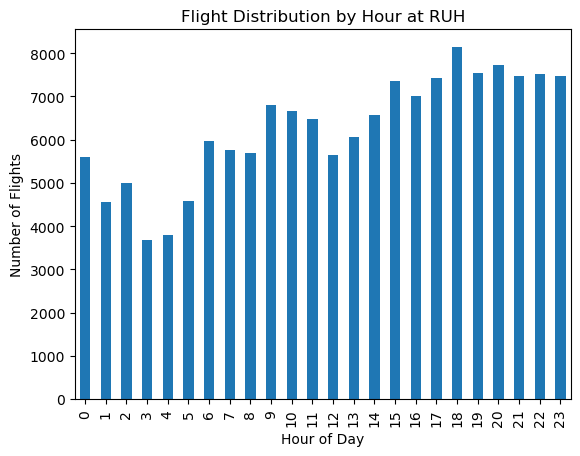

In [32]:
hour_counts.plot(kind='bar')
plt.title("Flight Distribution by Hour at RUH")
plt.xlabel("Hour of Day")
plt.ylabel("Number of Flights")
plt.show()

In [33]:
df_final = df_clean.copy()

In [34]:
cols_to_drop = [
    'aircraft.reg',
    'aircraft.modeS',
    'callSign',
    'movement.airport.timeZone'
]

df_final = df_final.drop(columns=cols_to_drop)


In [35]:
df_final.shape

(150519, 21)

In [36]:
top_airlines = df_final['airline.name'].value_counts().head(10)
top_airlines

airline.name
Saudi Arabian    59861
flynas           33721
flyadeal         24057
flydubai          2059
Gulf Air          2046
Qatar             1800
EgyptAir          1629
Etihad            1539
Emirates          1353
Turkish           1259
Name: count, dtype: int64

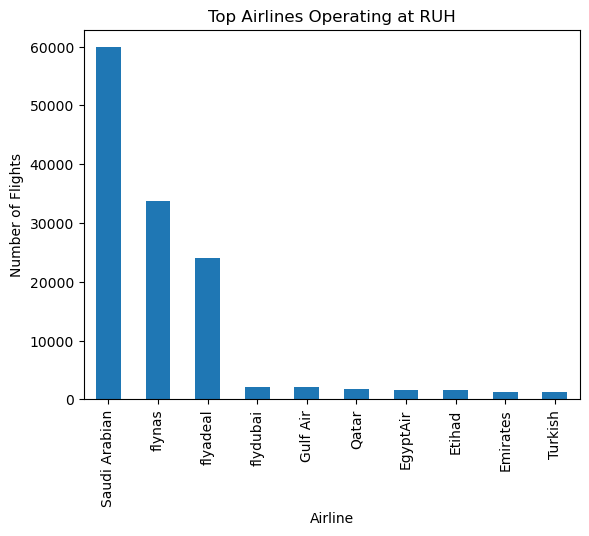

In [37]:
top_airlines.plot(kind='bar')
plt.title("Top Airlines Operating at RUH")
plt.xlabel("Airline")
plt.ylabel("Number of Flights")
plt.show()

In [38]:
status_counts = df_final['status'].value_counts()
status_counts

status
Unknown              125892
Expected              13037
Departed              11479
Canceled                 78
CanceledUncertain        33
Name: count, dtype: int64